#1) Importando Bibliotecas

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pandas as pd

In [15]:
minimo_infectados = pd.read_csv('/home/germano/Área de trabalho/Códigos IC/Dados/prob_ext_germano.csv', header=None)
minimo_infectados = minimo_infectados.iloc[1:].reset_index(drop=True)

# 2. Definir os nomes das colunas
minimo_infectados.columns = [
    'Removal Rate',
    'Basic Reprodution Number',
    'Immunity loss rate',
    'Vaccination begin time',
    'Vaccines Number (Normalized)',
    'Vaccination Rate',
    'Population',
    'Extinction Probability'
]

minimo_infectados = minimo_infectados.astype('float')
# Calculating the log of the population 
minimo_infectados['Population (log)'] = np.log10(minimo_infectados['Population'].replace(0, np.nan))

# Protection against division by zero
pop = minimo_infectados['Population'].replace(0, np.nan)

# Removing the population column
minimo_infectados = minimo_infectados.drop(columns=['Population'])


/tmp/ipykernel_17769/3390112745.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  minimo_infectados = pd.read_csv('/home/germano/Área de trabalho/Códigos IC/Dados/prob_ext_germano.csv', header=None)


array([[<Axes: title={'center': 'Removal Rate'}>,
        <Axes: title={'center': 'Basic Reprodution Number'}>,
        <Axes: title={'center': 'Immunity loss rate'}>],
       [<Axes: title={'center': 'Vaccination begin time'}>,
        <Axes: title={'center': 'Vaccines Number (Normalized)'}>,
        <Axes: title={'center': 'Vaccination Rate'}>],
       [<Axes: title={'center': 'Extinction Probability'}>,
        <Axes: title={'center': 'Population (log)'}>, <Axes: >]],
      dtype=object)

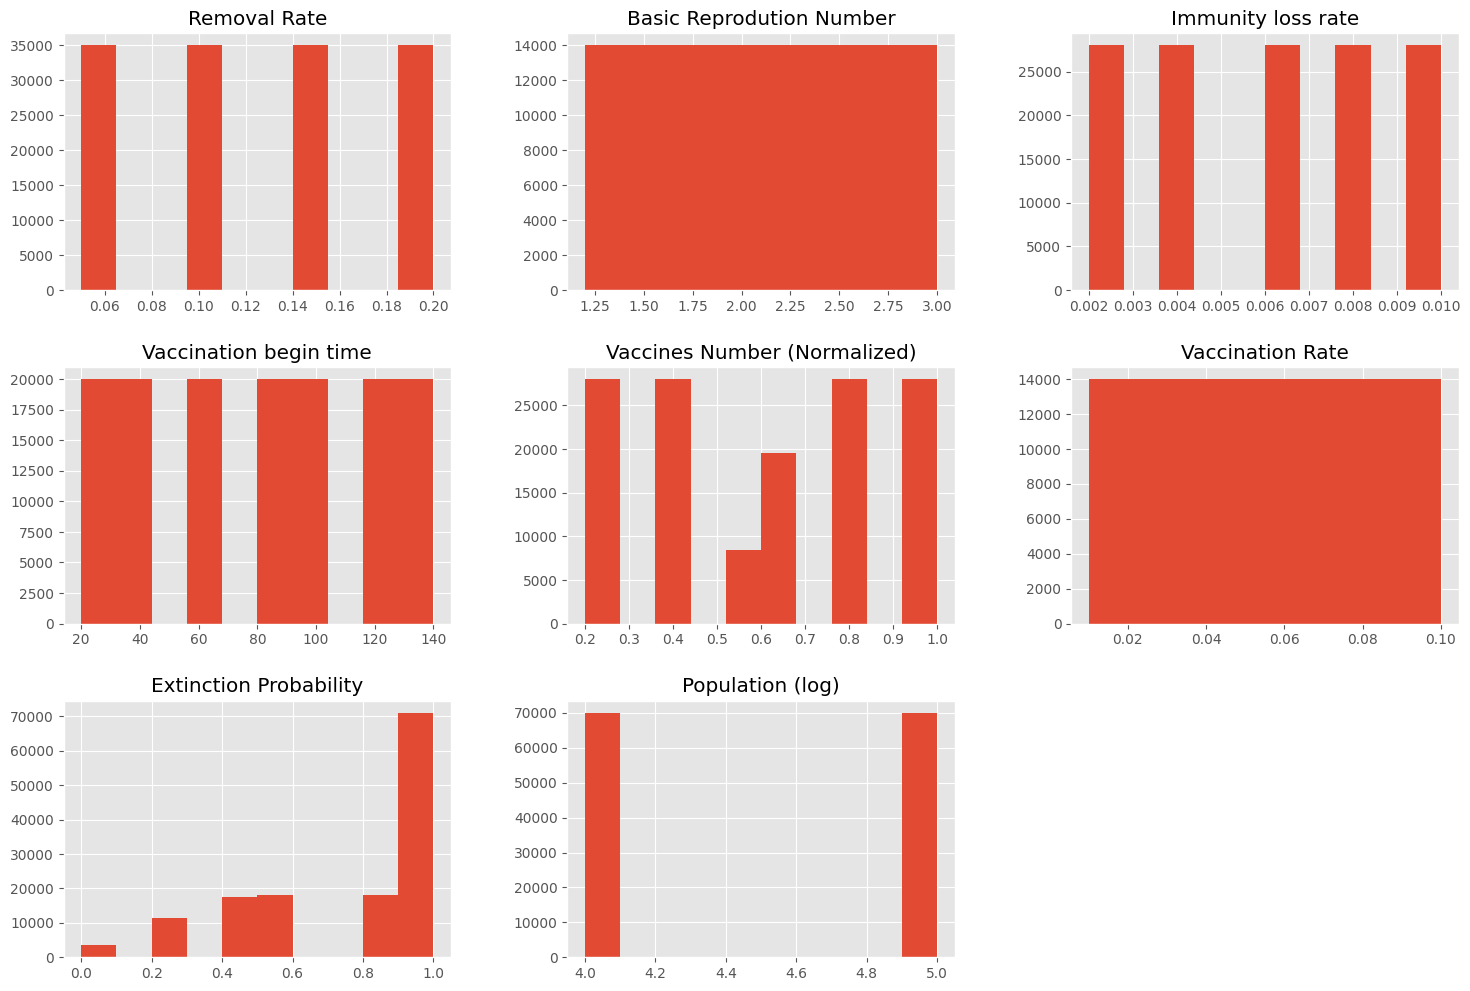

In [16]:
minimo_infectados.hist(figsize=(18, 12))

/tmp/ipykernel_17769/2897760471.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  minimo_infectados = minimo_infectados.applymap(lambda x: arredondar_significativos(x, alg=4))


[[0.95811429 0.96365714 0.9688     0.97651429]
 [0.87068571 0.8736     0.90548571 0.93565714]
 [0.76308571 0.78994286 0.86462857 0.91588571]
 [0.66148571 0.72828571 0.84525714 0.9064    ]
 [0.58068571 0.68097143 0.8208     0.89405714]
 [0.5176     0.64371429 0.80765714 0.88725714]
 [0.4736     0.60982857 0.78948571 0.87891429]
 [0.4284     0.58908571 0.76897143 0.86514286]
 [0.3896     0.56634286 0.74977143 0.85594286]
 [0.36388571 0.54565714 0.72337143 0.84154286]]


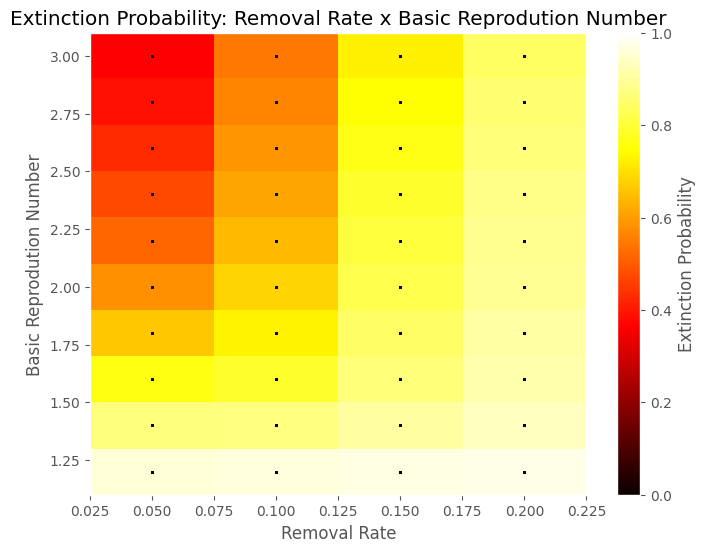

[[0.69274286 0.90082857 0.96934286 0.98665714]
 [0.60808571 0.77157143 0.9082     0.95794286]
 [0.58071429 0.66017143 0.83242857 0.91617143]
 [0.56348571 0.59925714 0.74548571 0.84562857]
 [0.55854286 0.56371429 0.66665714 0.77225714]]


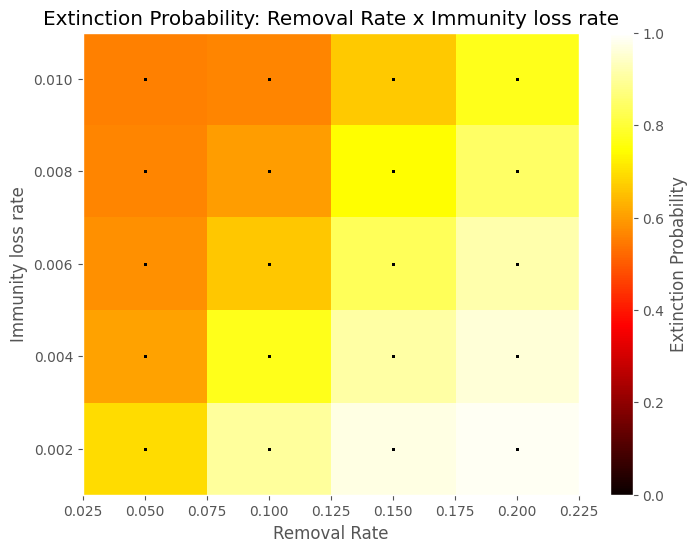

[[0.6748  0.66552 0.70024 0.75764]
 [0.61992 0.63908 0.7424  0.8576 ]
 [0.5964  0.6596  0.80972 0.92804]
 [0.58348 0.68808 0.86704 0.94976]
 [0.57772 0.7222  0.88692 0.94376]
 [0.57592 0.75124 0.88752 0.92376]
 [0.57676 0.76804 0.87712 0.90956]]


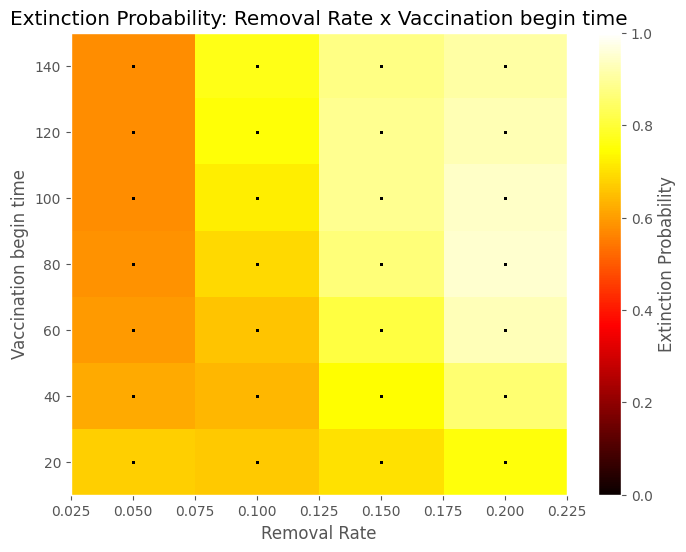

[[0.51911429 0.59468571 0.69142857 0.77105714]
 [0.54865714 0.63314286 0.76608571 0.85251429]
 [0.5836     0.6878     0.83305714 0.91437143]
 [0.63617143 0.7544     0.89288571 0.95782857]
 [0.71602857 0.82551429 0.93865714 0.98288571]]


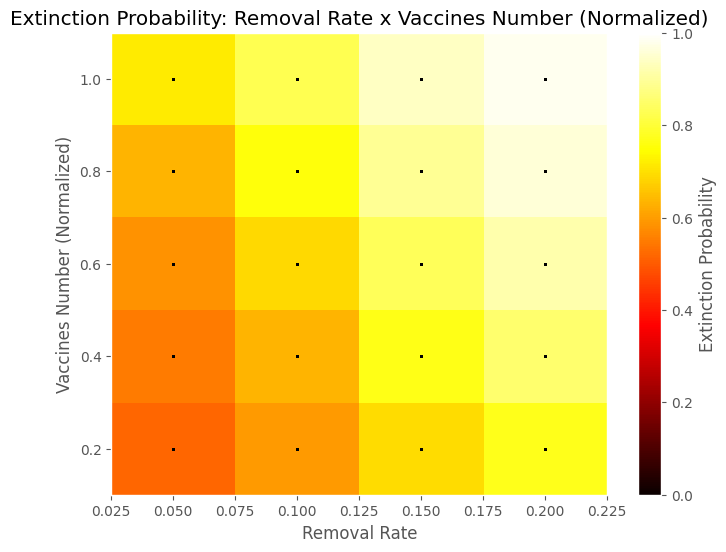

[[0.59245714 0.76931429 0.87954286 0.92982857]
 [0.60508571 0.72925714 0.85805714 0.9192    ]
 [0.60382857 0.71217143 0.83942857 0.91017143]
 [0.59805714 0.68925714 0.82782857 0.9       ]
 [0.6        0.6924     0.81691429 0.88971429]
 [0.60497143 0.68394286 0.81514286 0.89017143]
 [0.60577143 0.68891429 0.81102857 0.88611429]
 [0.60154286 0.68194286 0.80262857 0.88051429]
 [0.60194286 0.67668571 0.80297143 0.88394286]
 [0.59348571 0.6672     0.79068571 0.86765714]]


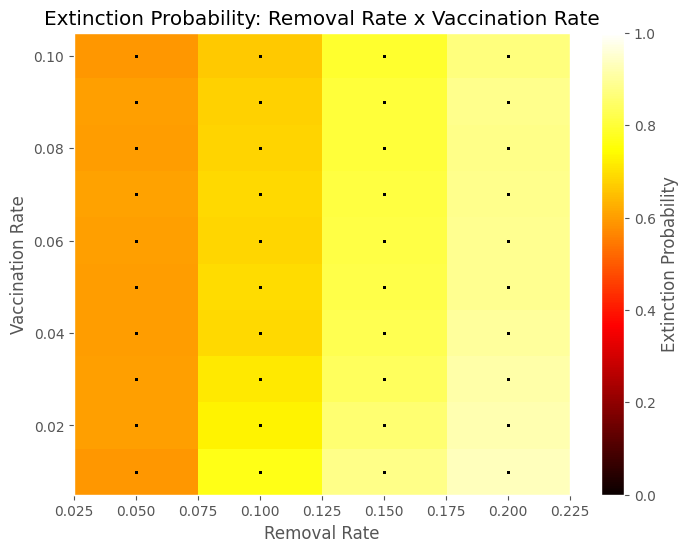

[[0.61091429 0.74938286 0.87781714 0.9352    ]
 [0.59051429 0.64883429 0.77102857 0.85626286]]


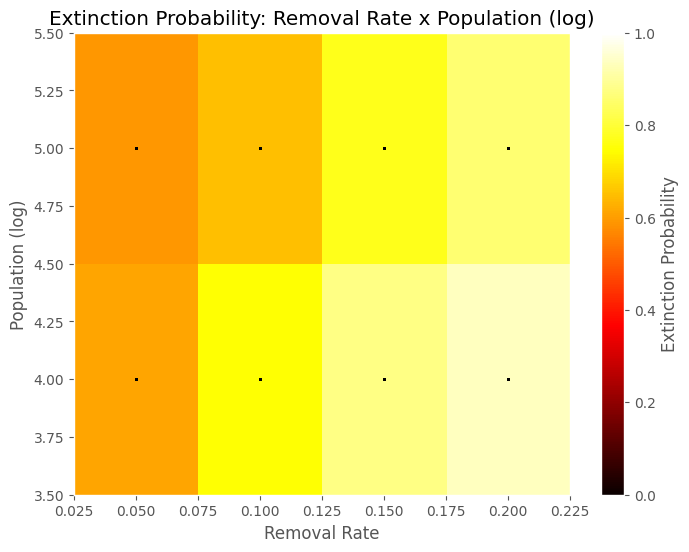

[[0.  0.  0.  0. ]
 [0.2 0.2 0.2 0.2]
 [0.4 0.4 0.4 0.4]
 [0.6 0.6 0.6 0.6]
 [0.8 0.8 0.8 0.8]
 [1.  1.  1.  1. ]]


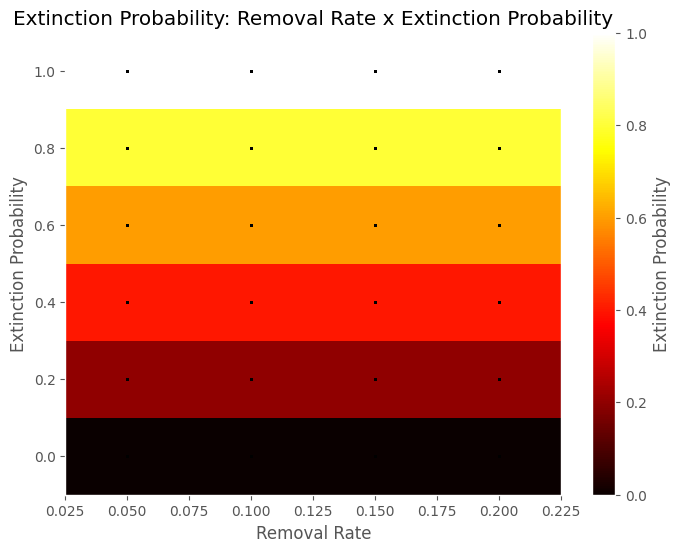

[[0.98592857 0.95235714 0.91764286 0.89457143 0.87392857 0.86728571
  0.85907143 0.85014286 0.83821429 0.83478571]
 [0.97607143 0.91585714 0.86721429 0.82928571 0.79671429 0.777
  0.76242857 0.74207143 0.72957143 0.71828571]
 [0.96628571 0.893      0.82835714 0.77764286 0.73492857 0.71114286
  0.67357143 0.65507143 0.63171429 0.602     ]
 [0.95671429 0.87335714 0.79171429 0.73057143 0.68028571 0.63592857
  0.60264286 0.56885714 0.539      0.50557143]
 [0.94885714 0.84721429 0.762      0.69471429 0.63478571 0.57892857
  0.54207143 0.49835714 0.46357143 0.43242857]]


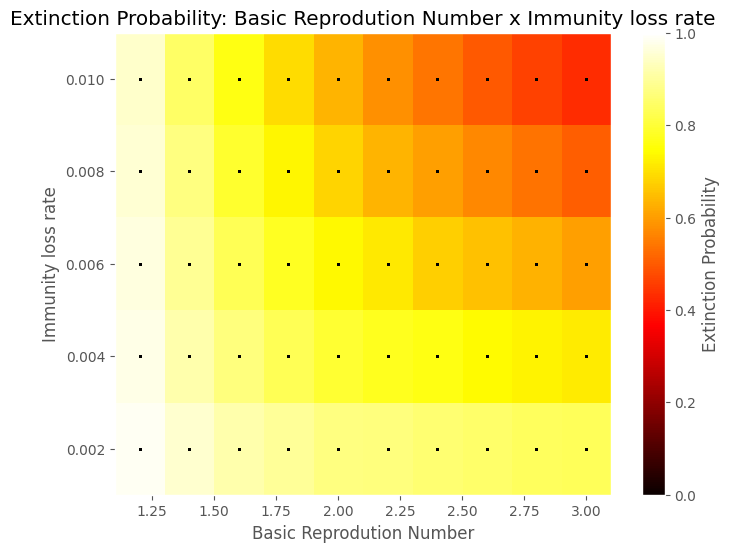

[[0.9777 0.9216 0.8491 0.7666 0.6832 0.6341 0.5911 0.5557 0.5197 0.4967]
 [0.9751 0.9074 0.813  0.7414 0.6779 0.6492 0.6287 0.6015 0.5819 0.5714]
 [0.9714 0.8902 0.8098 0.7628 0.7268 0.7006 0.6754 0.6614 0.6551 0.6309]
 [0.9654 0.8829 0.8244 0.7876 0.7571 0.7371 0.7191 0.6997 0.6822 0.6654]
 [0.9597 0.8846 0.8419 0.8025 0.7763 0.7559 0.7308 0.7156 0.6895 0.6697]
 [0.9595 0.8895 0.8458 0.8169 0.7957 0.7609 0.7363 0.7078 0.6822 0.6515]
 [0.9586 0.8983 0.8497 0.8197 0.7919 0.7606 0.7343 0.6986 0.6723 0.6447]]


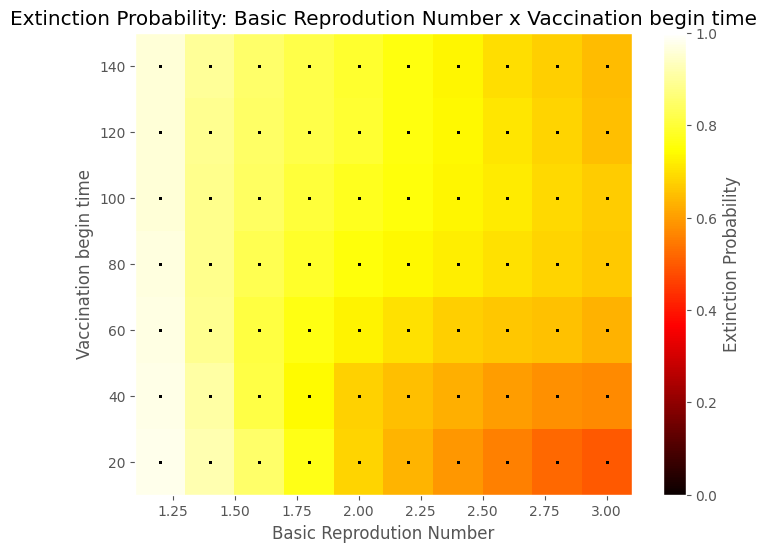

[[0.88871429 0.76371429 0.704      0.66078571 0.62907143 0.60157143
  0.5795     0.5615     0.53478571 0.51707143]
 [0.95964286 0.82842857 0.73928571 0.70807143 0.67878571 0.65892857
  0.639      0.61935714 0.59257143 0.57692857]
 [0.98842857 0.92385714 0.83721429 0.76757143 0.71985714 0.70564286
  0.68264286 0.658      0.64028571 0.62357143]
 [0.99757143 0.97457143 0.92221429 0.86364286 0.80857143 0.76021429
  0.73157143 0.70042857 0.68464286 0.65978571]
 [0.9995     0.99121429 0.96421429 0.92671429 0.88435714 0.84392857
  0.80707143 0.77521429 0.74978571 0.71571429]]


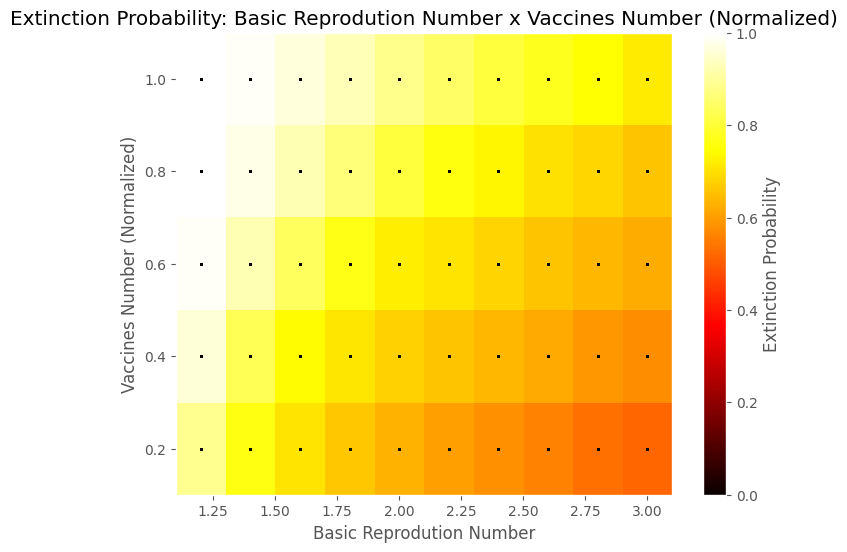

[[0.97071429 0.90171429 0.83242857 0.79314286 0.769      0.75614286
  0.74114286 0.73414286 0.721      0.70842857]
 [0.971      0.89985714 0.836      0.79485714 0.76514286 0.73571429
  0.72357143 0.69942857 0.68585714 0.66757143]
 [0.96728571 0.89771429 0.83942857 0.79642857 0.75571429 0.73042857
  0.69542857 0.67971429 0.65542857 0.64642857]
 [0.96628571 0.898      0.83442857 0.78785714 0.74114286 0.70457143
  0.689      0.66071429 0.63685714 0.619     ]
 [0.96514286 0.89328571 0.83685714 0.78457143 0.74385714 0.70528571
  0.67657143 0.65642857 0.63028571 0.60528571]
 [0.96942857 0.89714286 0.836      0.78042857 0.74442857 0.70928571
  0.682      0.64142857 0.62785714 0.59757143]
 [0.96585714 0.89771429 0.83657143 0.79442857 0.73757143 0.711
  0.679      0.65028571 0.61442857 0.59271429]
 [0.96528571 0.89128571 0.83342857 0.77957143 0.72857143 0.70185714
  0.66971429 0.644      0.61742857 0.58542857]
 [0.966      0.90028571 0.83042857 0.77       0.73442857 0.70114286
  0.66971429 0.63

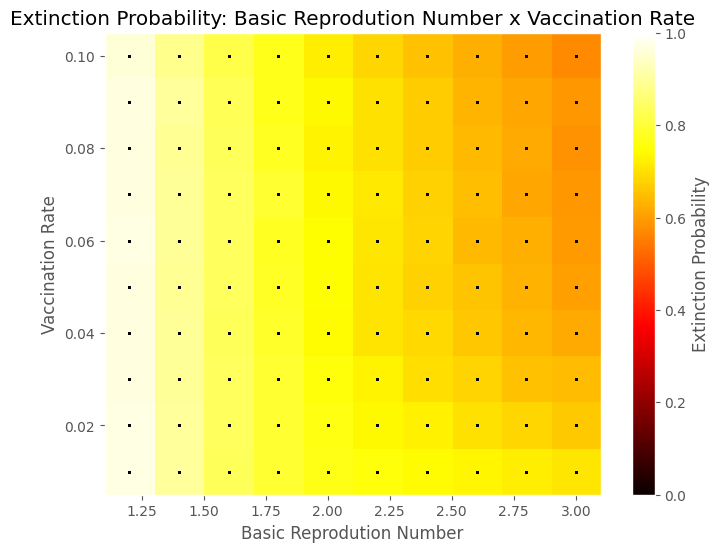

[[0.97491429 0.91614286 0.86034286 0.81822857 0.78471429 0.7576
  0.73657143 0.7142     0.6952     0.67537143]
 [0.95862857 0.87657143 0.80642857 0.75248571 0.70354286 0.67051429
  0.63934286 0.6116     0.58562857 0.56185714]]


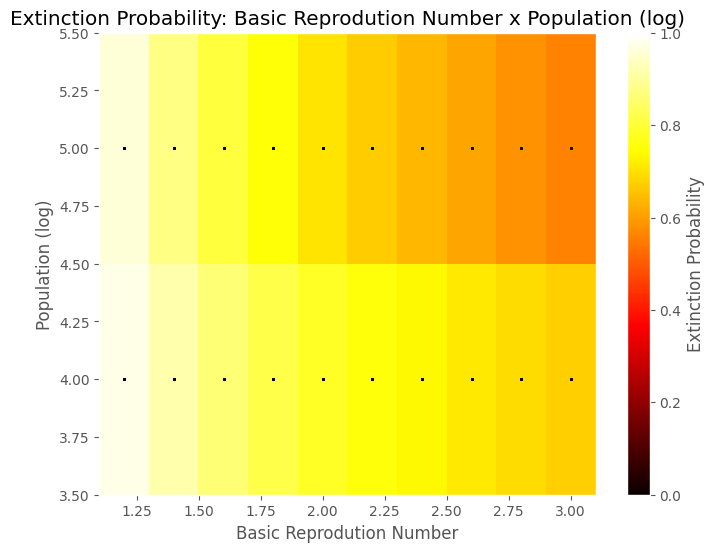

[[0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
 [0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
 [0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6]
 [0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8]
 [1.  1.  1.  1.  1.  1.  1.  1.  1.  1. ]]


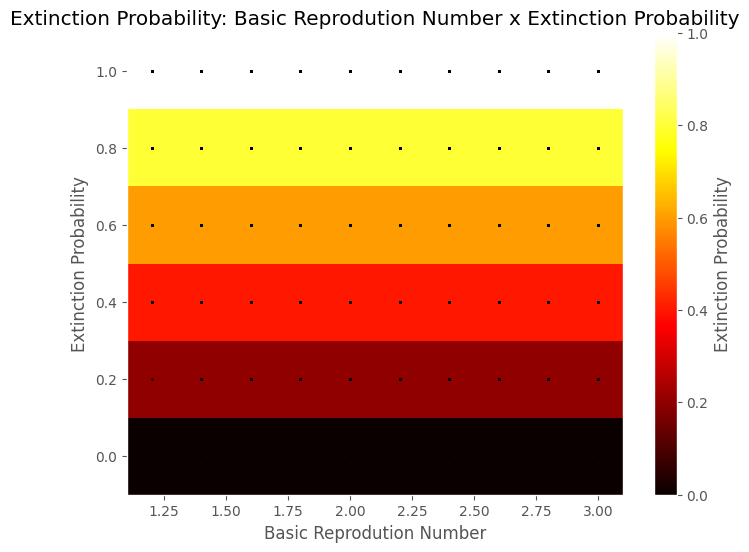

[[0.83975 0.7294  0.6802  0.6379  0.6105 ]
 [0.8524  0.76375 0.69765 0.6524  0.60755]
 [0.87865 0.7975  0.73525 0.68565 0.64515]
 [0.89375 0.82265 0.76805 0.71065 0.66535]
 [0.9084  0.8422  0.78475 0.71755 0.66035]
 [0.9144  0.8563  0.7835  0.7142  0.65465]
 [0.9244  0.86835 0.7822  0.7009  0.6385 ]]


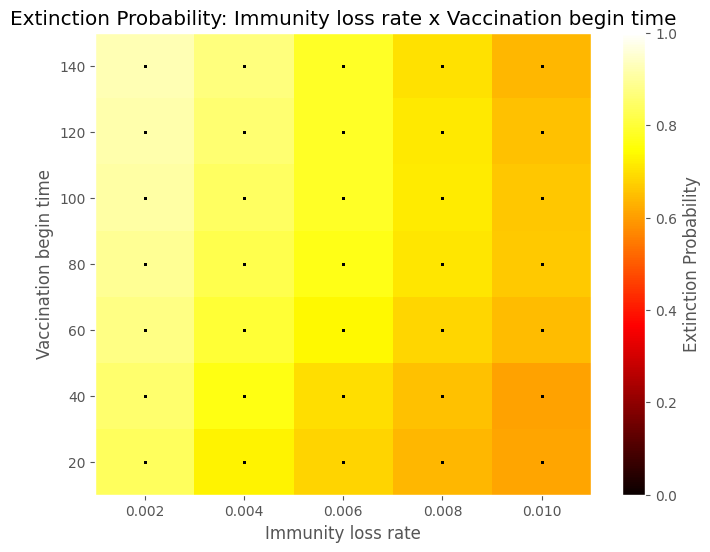

[[0.83525    0.71832143 0.61764286 0.54285714 0.50628571]
 [0.83075    0.75867857 0.70028571 0.63525    0.57553571]
 [0.864      0.80353571 0.75235714 0.70125    0.65239286]
 [0.92860714 0.85910714 0.80303571 0.75517857 0.70567857]
 [0.97835714 0.91760714 0.86353571 0.80778571 0.76157143]]


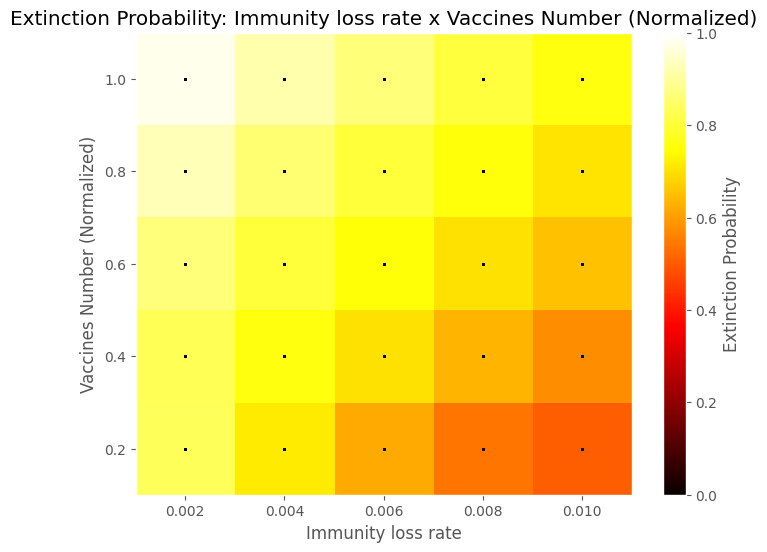

[[0.90771429 0.84164286 0.792      0.7385     0.68407143]
 [0.89707143 0.82814286 0.771      0.71835714 0.67492857]
 [0.89092857 0.81871429 0.7605     0.70507143 0.65678571]
 [0.88464286 0.81164286 0.747      0.68692857 0.63871429]
 [0.8835     0.81       0.73942857 0.68064286 0.63521429]
 [0.88378571 0.81028571 0.74285714 0.67928571 0.62657143]
 [0.88607143 0.807      0.7375     0.67707143 0.63214286]
 [0.88528571 0.80042857 0.73171429 0.67071429 0.62014286]
 [0.88064286 0.79735714 0.73407143 0.67107143 0.62378571]
 [0.87428571 0.78928571 0.71764286 0.657      0.61057143]]


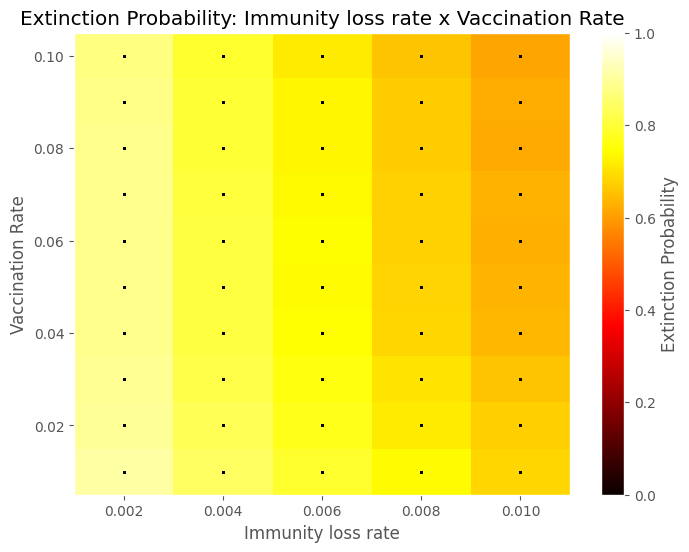

[[0.91775714 0.84887143 0.78901429 0.7312     0.6798    ]
 [0.85702857 0.77402857 0.70572857 0.64572857 0.60078571]]


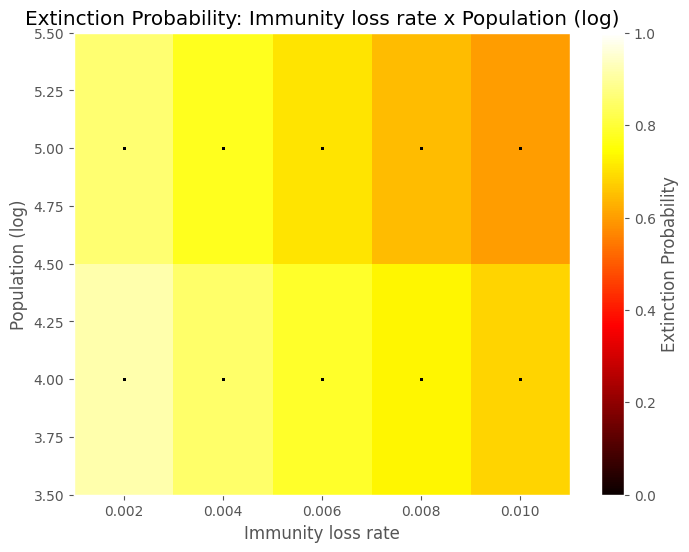

[[0.  0.  0.  0.  0. ]
 [0.2 0.2 0.2 0.2 0.2]
 [0.4 0.4 0.4 0.4 0.4]
 [0.6 0.6 0.6 0.6 0.6]
 [0.8 0.8 0.8 0.8 0.8]
 [1.  1.  1.  1.  1. ]]


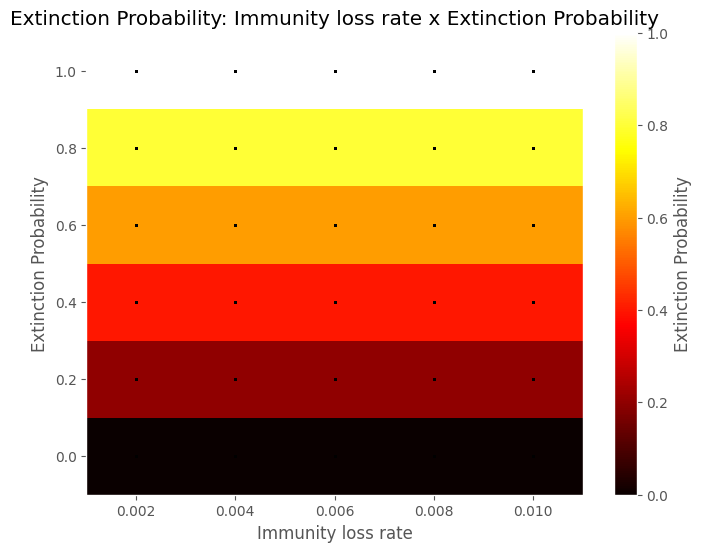

[[0.5899  0.6126  0.648   0.6667  0.6705  0.66195 0.65885]
 [0.59895 0.6352  0.692   0.7348  0.7482  0.74875 0.7428 ]
 [0.64905 0.69515 0.7451  0.77975 0.79725 0.806   0.81065]
 [0.7615  0.7714  0.80105 0.82245 0.83525 0.8409  0.8397 ]
 [0.89835 0.8594  0.85605 0.85675 0.86205 0.86545 0.86235]]


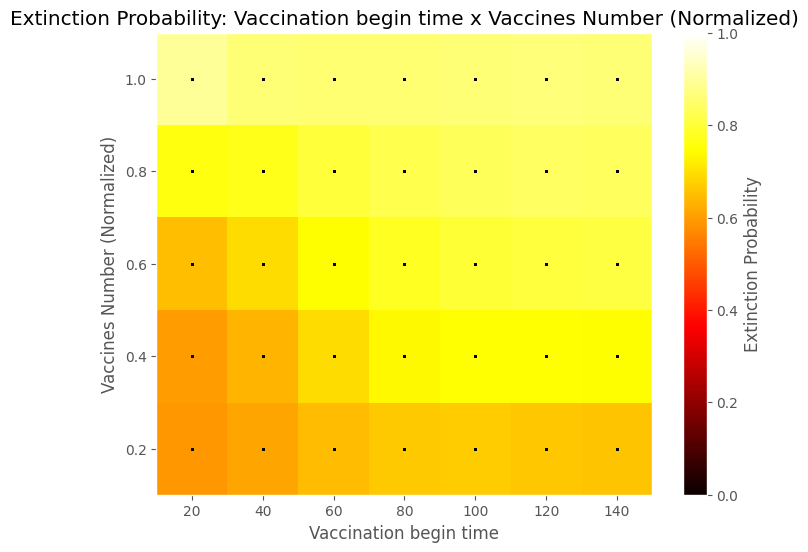

[[0.7251 0.7697 0.7963 0.8152 0.8205 0.8129 0.8098]
 [0.7138 0.7384 0.7747 0.7953 0.8055 0.8066 0.811 ]
 [0.7    0.7323 0.7634 0.784  0.7942 0.7955 0.7954]
 [0.6934 0.7082 0.7497 0.7694 0.786  0.7859 0.7839]
 [0.6997 0.7077 0.7462 0.7635 0.7756 0.777  0.7786]
 [0.6939 0.7047 0.7393 0.7644 0.7765 0.7823 0.7788]
 [0.7034 0.7059 0.7411 0.767  0.7689 0.778  0.7714]
 [0.692  0.7033 0.7255 0.7535 0.7703 0.7737 0.7733]
 [0.6927 0.6936 0.7286 0.7582 0.7703 0.7763 0.77  ]
 [0.6815 0.6837 0.7196 0.7504 0.7587 0.7579 0.7565]]


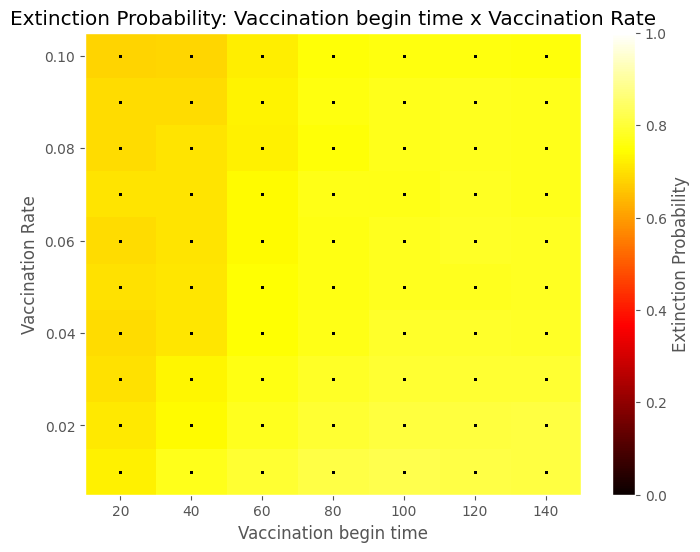

[[0.72822 0.75874 0.79346 0.80938 0.82086 0.82132 0.82132]
 [0.67088 0.67076 0.70342 0.7348  0.74444 0.7479  0.74442]]


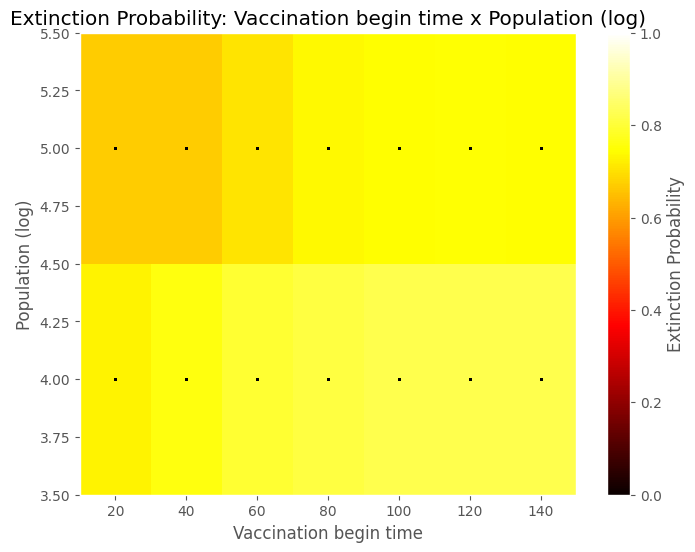

[[0.  0.  0.  0.  0.  0.  0. ]
 [0.2 0.2 0.2 0.2 0.2 0.2 0.2]
 [0.4 0.4 0.4 0.4 0.4 0.4 0.4]
 [0.6 0.6 0.6 0.6 0.6 0.6 0.6]
 [0.8 0.8 0.8 0.8 0.8 0.8 0.8]
 [1.  1.  1.  1.  1.  1.  1. ]]


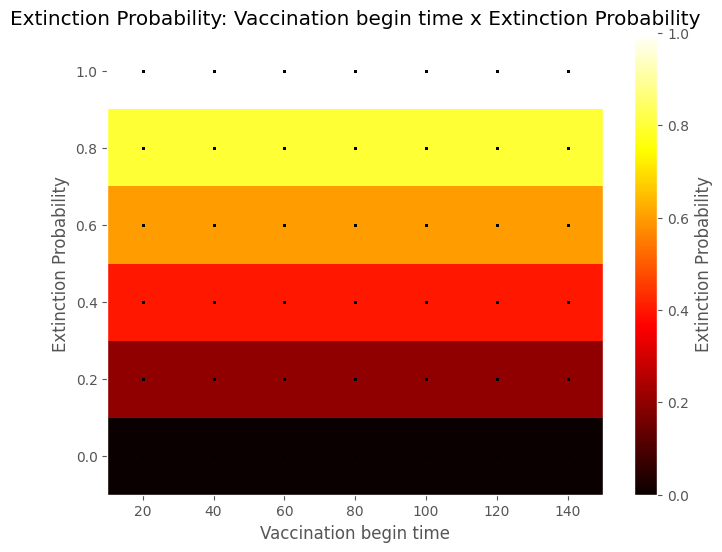

[[0.66214286 0.72921429 0.80735714 0.86014286 0.90507143]
 [0.65264286 0.72035714 0.7825     0.843      0.891     ]
 [0.64257143 0.71242857 0.77171429 0.82621429 0.87907143]
 [0.64678571 0.69764286 0.74885714 0.81328571 0.86235714]
 [0.63507143 0.6935     0.75378571 0.80542857 0.861     ]
 [0.64478571 0.6935     0.74178571 0.80764286 0.85507143]
 [0.63421429 0.69928571 0.743      0.80442857 0.85885714]
 [0.64871429 0.68435714 0.74257143 0.7845     0.84814286]
 [0.64478571 0.69585714 0.72864286 0.77985714 0.85778571]
 [0.629      0.67485714 0.72685714 0.77871429 0.83935714]]


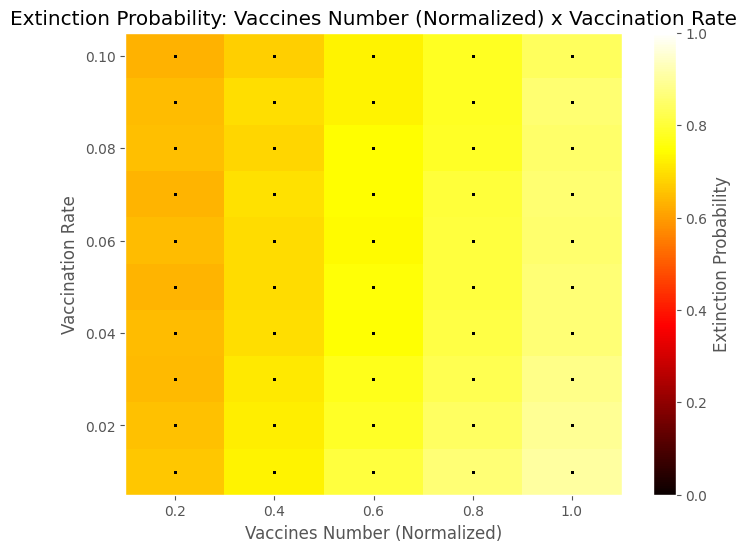

[[0.68501429 0.74411429 0.79642857 0.8472     0.89388571]
 [0.60312857 0.65608571 0.71298571 0.77344286 0.83765714]]


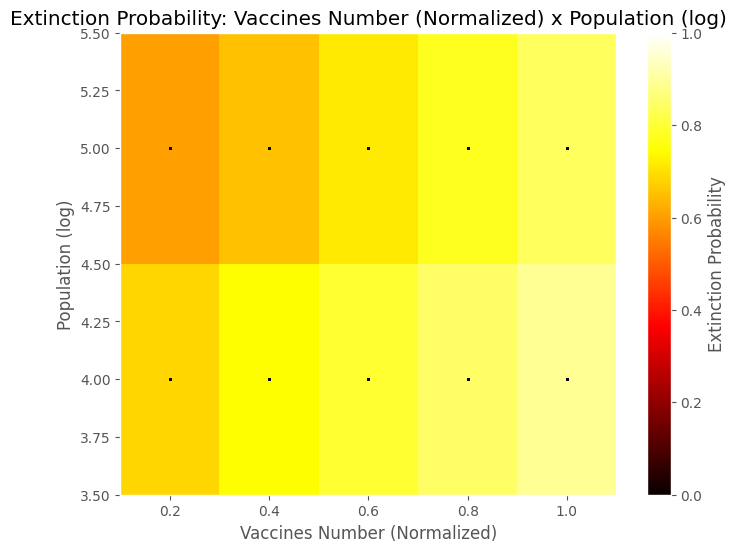

[[0.  0.  0.  0.  0. ]
 [0.2 0.2 0.2 0.2 0.2]
 [0.4 0.4 0.4 0.4 0.4]
 [0.6 0.6 0.6 0.6 0.6]
 [0.8 0.8 0.8 0.8 0.8]
 [1.  1.  1.  1.  1. ]]


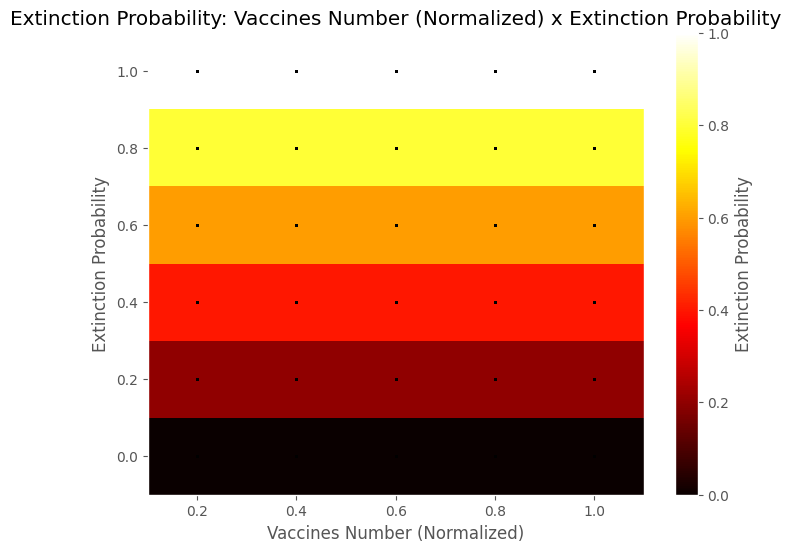

[[0.8286     0.81462857 0.8052     0.79277143 0.78817143 0.78817143
  0.78645714 0.77871429 0.78265714 0.76791429]
 [0.75697143 0.74117143 0.7276     0.7148     0.71134286 0.70894286
  0.70945714 0.7046     0.70011429 0.6916    ]]


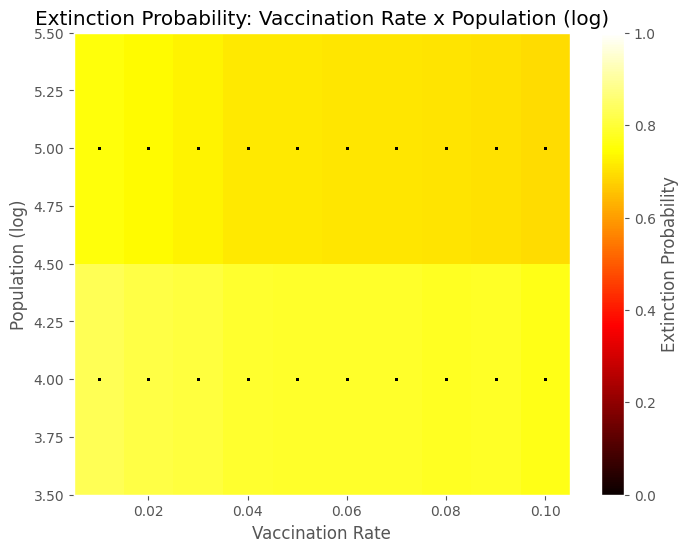

[[0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
 [0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
 [0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6]
 [0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8]
 [1.  1.  1.  1.  1.  1.  1.  1.  1.  1. ]]


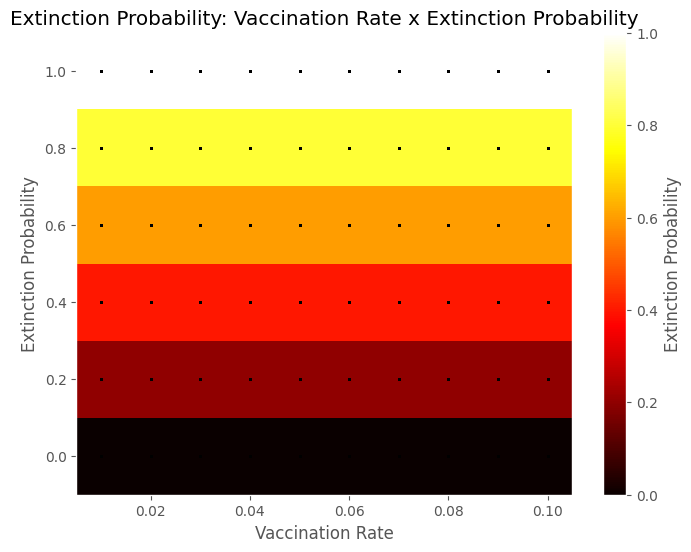

[[0.  0. ]
 [0.2 0.2]
 [0.4 0.4]
 [0.6 0.6]
 [0.8 0.8]
 [1.  1. ]]


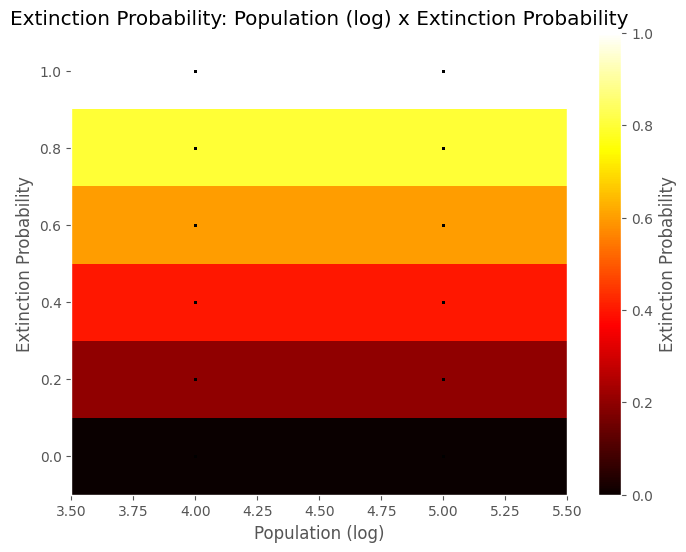

In [17]:
column_names = ['Removal Rate',
    'Basic Reprodution Number',
    'Immunity loss rate',
    'Vaccination begin time',
    'Vaccines Number (Normalized)',
    'Vaccination Rate',
    'Population (log)',
    'Extinction Probability']
def arredondar_significativos(x, alg=4):
    if isinstance(x, (int, float, np.number)):
        if x == 0:
            return 0
        else:
            return round(x, -int(np.floor(np.log10(abs(x)))) + (alg - 1))
    return x  # retorna valor original se não for número

# Aplica a função a todas as células do DataFrame
minimo_infectados = minimo_infectados.applymap(lambda x: arredondar_significativos(x, alg=4))

# Filtrar os dados
filtered_data = minimo_infectados[
    (minimo_infectados['Immunity loss rate'] <= 0.01) & 
    (minimo_infectados['Basic Reprodution Number'] <= 3)
]

for u in range(len(column_names)):
    for v in range(u+1, len(column_names)):
        m = column_names[u]
        n = column_names[v]
        
        x = filtered_data[m].values
        y = filtered_data[n].values
        z = filtered_data['Extinction Probability'].values
        
        x_unique = np.sort(filtered_data[m].unique())
        y_unique = np.sort(filtered_data[n].unique())
        
        # Passo 1: Calcular os limites dos bins (pontos intermediários)
        x_edges = np.zeros(len(x_unique) + 1)
        x_edges[1:-1] = (x_unique[:-1] + x_unique[1:]) / 2
        x_edges[0] = x_unique[0] - (x_unique[1] - x_unique[0]) / 2  # Extrapolação para o primeiro ponto
        x_edges[-1] = x_unique[-1] + (x_unique[-1] - x_unique[-2]) / 2  # Extrapolação para o último ponto
        
        y_edges = np.zeros(len(y_unique) + 1)
        y_edges[1:-1] = (y_unique[:-1] + y_unique[1:]) / 2
        y_edges[0] = y_unique[0] - (y_unique[1] - y_unique[0]) / 2
        y_edges[-1] = y_unique[-1] + (y_unique[-1] - y_unique[-2]) / 2
        
        # Passo 2: Criar a matriz Z (agora com dimensões baseadas nos edges)
        Z = np.zeros((len(y_unique), len(x_unique)))
        
        for i, xi in enumerate(x_unique):
            for j, yj in enumerate(y_unique):
                mask = (filtered_data[m] == xi) & (filtered_data[n] == yj)
                if mask.any():
                    Z[j, i] = filtered_data.loc[mask, 'Extinction Probability'].values.mean()
        
        # Passo 3: Ajustar `extent` para que os pixels estejam centralizados
        extent = [x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]]
        
        print(Z)
        # Passo 4: Plotar o heatmap com ajuste de alinhamento
        plt.figure(figsize=(8, 6))
        plt.imshow(
            Z, 
            aspect='auto', 
            origin='lower', 
            cmap='hot', 
            extent=extent,  # Usando os limites ajustados
            vmin=0, 
            vmax=1,
            interpolation='nearest'  # Evita suavização indesejada
        )
        plt.colorbar(label="Extinction Probability")
        plt.xlabel(m)
        plt.ylabel(n)
        plt.grid(False)
        plt.title(f"Extinction Probability: {m} x {n}")
        plt.scatter(x, y, color='black', s=2, alpha=0.5)  # Mostrar pontos de dados reais
        plt.show()